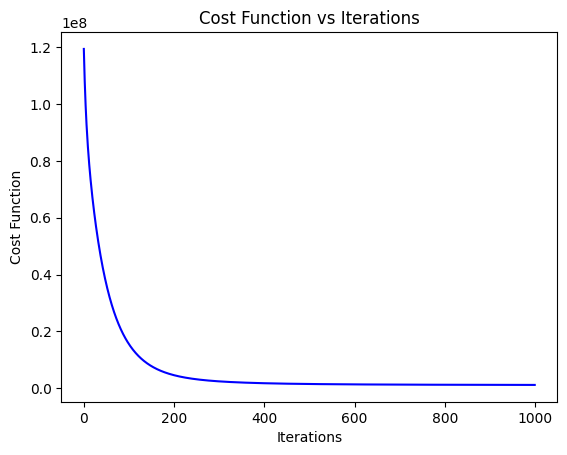

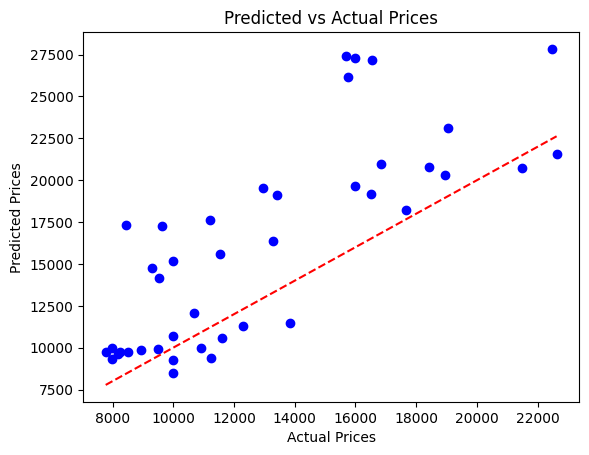

R^2 score: -0.3149


In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Inspecting the data
df.head()
df=df.drop(['car_ID','symboling','CarName'], axis='columns')

# Feature Engineering: One-Hot Encoding categorical variables manually
# Assume 'make', 'fuel_type', and 'body_style' are categorical columns
categorical_columns = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem',
    'drivewheel'
]
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Separating features and target variable
X = df_encoded.drop('price', axis=1)  # Features (excluding the 'price' column)
y = df_encoded['price']  # Target (price)



# Feature scaling (normalization)
X_scaled = (X - X.mean()) / X.std()

# Adding bias term (intercept) manually
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Convert target variable into numpy array
y = y.values.reshape(-1, 1)

# Splitting the dataset into training and test sets (manually)
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Linear Regression using Gradient Descent

def compute_cost(X, y, theta):
    """
    Compute cost for linear regression
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Perform gradient descent to learn theta
    """
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot(predictions - y))
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Initialize theta (parameters) to zero
theta = np.zeros((X_train.shape[1], 1))

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Plotting the cost function vs iterations
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

# Predictions on test set
y_pred = X_test.dot(theta)

# Plotting the predicted prices vs actual prices (on the test set)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Compute R^2 score
def r2_score_manual(y_true, y_pred):
    """
    Compute the R^2 score manually
    """
    ss_total = np.sum(np.square(y_true - np.mean(y_true)))
    ss_residual = np.sum(np.square(y_true - y_pred))
    r2 = 1 - (ss_residual / ss_total)
    return r2

# R^2 score for the test set
r2 = r2_score_manual(y_test, y_pred)
print(f'R^2 score: {r2:.4f}')
